# Third-Party Data Analysis
Lawrence Lim

# What is this?
What we are doing on this Ipython Notebook file is importing and analyzing data from various third-party sources to add more interesting insights to our original analysis of the stats btc dataset

### Python Package Imports
Import Google Trends data using [**pytrends**](https://pypi.org/project/pytrends/#interest-over-time), Python package that allows simple interface for automating downloading of reports from Google Trends.  

In [14]:
#!pip install pytrends
from pytrends.request import TrendReq

For data analysis and visualization, import pandas, numpy, and matplotlib:
- Pandas: 
- Numpy:
- Matplotlib

In [15]:
# Data Analysis Packages
import pandas as pd
import numpy as np

We need to also import data visualization software so that we can make the graphs all nice

In [16]:
# Graphing Packages
import seaborn
import matplotlib.pyplot as plt
seaborn.set_style("darkgrid")

In [17]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

In [18]:
# set the keyword & timeframe
keywords = ["Coinbase", "Binance"]
pt.build_payload(keywords, timeframe="all")
# get the interest over time
exch = pt.interest_over_time()
# Save iot as a .csv file in the current directory
exch.to_csv("data\\exch.csv")
exch

,Coinbase,Binance,isPartial
date,,,
2004-01-01,0,0,False
2004-02-01,0,0,False
2004-03-01,0,0,False
2004-04-01,0,0,False
2004-05-01,0,0,False
...,...,...,...
2022-01-01,5,10,False
2022-02-01,4,7,False
2022-03-01,3,7,False


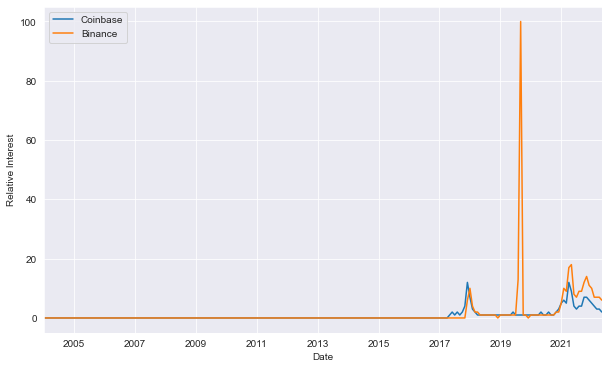

In [19]:
exch.plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")
# Save the plot to present directory
plt.savefig("plots\\exch.png")

In [20]:
# set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum"]
pt.build_payload(keywords, timeframe="all")
# get the interest over time
iot = pt.interest_over_time()
# Save iot as a .csv file in the current directory
iot.to_csv("data\\iot.csv")
iot

,Bitcoin,Ethereum,isPartial
date,,,
2004-01-01,0,0,False
2004-02-01,0,0,False
2004-03-01,0,0,False
2004-04-01,0,0,False
2004-05-01,0,0,False
...,...,...,...
2022-01-01,38,9,False
2022-02-01,34,7,False
2022-03-01,29,6,False


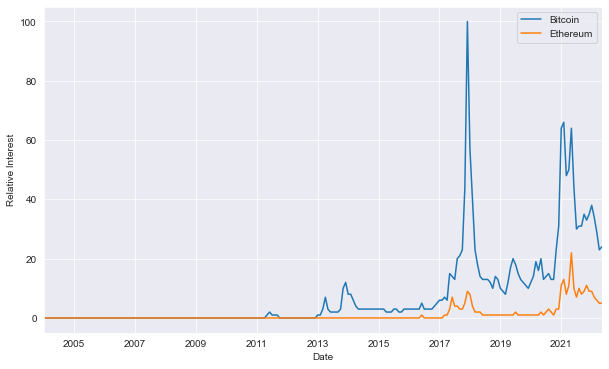

In [21]:
iot.plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")
# Save the plot to present directory
plt.savefig("plots\\iot.png")

In [22]:
# the keyword to extract data
keyword = ["Bitcoin"]
pt.build_payload(keyword, timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)
# Convert the series ibr to pandas dataframe
ibr = pd.DataFrame(ibr)
# Sort the dataframe by the value of the column "Bitcoin"
ibr.sort_values("Bitcoin", inplace=True, ascending=False)
# Save the dataframe to a csv file
ibr.to_csv("data\\ibr.csv")
ibr

,geoCode,Bitcoin
geoName,,
Nigeria,NG,100
El Salvador,SV,71
Namibia,NA,63
Eswatini,SZ,59
Cayman Islands,KY,57
...,...,...
Eritrea,ER,0
Pitcairn Islands,PN,0
Falkland Islands (Islas Malvinas),FK,0


In [23]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2009,1,3)
end = dt.datetime(2022,5,1)
# end = dt.datetime.now()

btc = web.DataReader('BTC-USD', 'yahoo', start, end)
btc.to_csv("data\\exch.csv")

for i in btc.index:
    # print(str(i)[8:10])
    if str(i)[8:10] != '01':
        btc.drop(i, inplace=True)
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-01,391.378998,380.779999,387.427002,383.614990,26229400,383.614990
2014-11-01,340.528992,321.054993,338.649994,325.748993,16677200,325.748993
2014-12-01,383.661987,376.669006,378.248993,379.244995,11763000,379.244995
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-02-01,231.574005,212.014999,216.867004,226.972000,29128500,226.972000
...,...,...,...,...,...,...
2022-01-01,47827.312500,46288.484375,46311.746094,47686.812500,24582667004,47686.812500
2022-02-01,39115.132812,38113.664062,38481.765625,38743.273438,20288500328,38743.273438
2022-03-01,44793.601562,42952.585938,43194.503906,44354.636719,32479047645,44354.636719


In [24]:
for i in iot.index:
    # print(str(i)[8:10])
    if int(str(i)[2:4]) < 14:
        iot.drop(i, inplace=True)
    if str(i)[2:4] == '14' and int(str(i)[5:7]) < 10:
        iot.drop(i, inplace=True)
iot

,Bitcoin,Ethereum,isPartial
date,,,
2014-10-01,3,0,False
2014-11-01,3,0,False
2014-12-01,3,0,False
2015-01-01,3,0,False
2015-02-01,3,0,False
...,...,...,...
2022-01-01,38,9,False
2022-02-01,34,7,False
2022-03-01,29,6,False


In [31]:
# Concatendate the two dataframes
df_concat = pd.concat([btc['High'],iot['Bitcoin'],btc['Volume']],axis=1)
df_concat

,High,Bitcoin,Volume
2014-10-01,391.378998,3,26229400
2014-11-01,340.528992,3,16677200
2014-12-01,383.661987,3,11763000
2015-01-01,320.434998,3,8036550
2015-02-01,231.574005,3,29128500
...,...,...,...
2022-01-01,47827.312500,38,24582667004
2022-02-01,39115.132812,34,20288500328
2022-03-01,44793.601562,29,32479047645
2022-04-01,46616.242188,23,38162644287


In [32]:
#Scale the data
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 100 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df_concat)
scaled
df_scale = pd.DataFrame(scaled, columns = df_concat.columns)
df_scale

,High,Bitcoin,Volume
0,0.257547,1.020408,0.029505
1,0.175779,1.020408,0.014013
2,0.245138,1.020408,0.006043
3,0.143467,1.020408,0.000000
4,0.000576,1.020408,0.034206
...,...,...,...
87,76.536082,36.734694,39.854332
88,62.526612,32.653061,32.890193
89,71.657776,27.551020,52.660424
90,74.588642,21.428571,61.877895


Text(0, 0.5, 'Time')

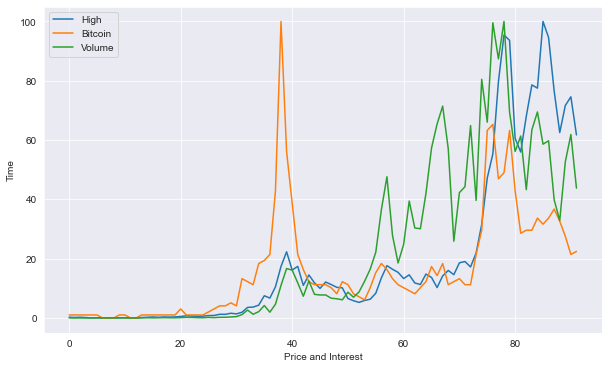

In [33]:
# Plot the data
df_scale.plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Price and Interest")
plt.ylabel("Time")



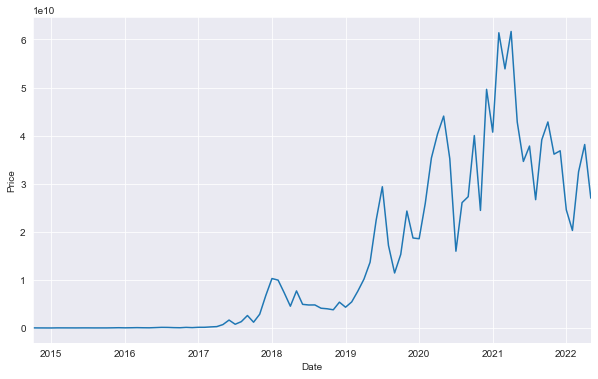

In [ ]:
# Plot BTC Volume
btc['Volume'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

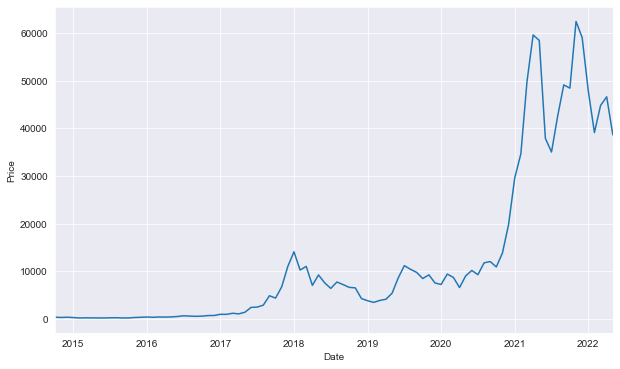

In [ ]:
# Plot BTC Volume
btc['High'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")